<h1><font color='blue'> Finding the Probability P(Y==1|X)</font></h1>

<h2><font color='Geen'> 1: Implementing Decision Function of SVM RBF Kernel</font></h2>

<font face=' Comic Sans MS' size=3>After we train a kernel SVM model, we will be getting support vectors and their corresponsing coefficients $\alpha_{i}$

Check the documentation for better understanding of these attributes: 

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
<img src='https://i.imgur.com/K11msU4.png' width=500>

As a part of this notebook we will be implementing the ```decision_function()``` of kernel SVM, here decision_function() means based on the value return by ```decision_function()``` model will classify the data points either as positive or negative

Ex 1: In logistic regression After training the models with the optimal weights $w$ we get, we will find the value $\frac{1}{1+\exp(-(wx+b))}$, if this value comes out to be < 0.5 we will mark it as negative class, else its positive class

Ex 2: In Linear SVM After training the models with the optimal weights $w$ we get, we will find the value of $sign(wx+b)$, if this value comes out to be -ve we will mark it as negative class, else its positive class.

Similarly in Kernel SVM After traning the models with the coefficients $\alpha_{i}$ we get, we will find the value of 
$sign(\sum_{i=1}^{n}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, here $K(x_{i},x_{q})$ is the RBF kernel. If this value comes out to be -ve we will mark $x_{q}$ as negative class, else its positive class.

RBF kernel is defined as: $K(x_{i},x_{q})$ = $exp(-\gamma ||x_{i} - x_{q}||^2)$

For better understanding check this link: https://scikit-learn.org/stable/modules/svm.html#svm-mathematical-formulation
</font>

## Applying SVC

> 1. Split the data into $X_{train}$(60), $X_{cv}$(20), $X_{test}$(20)

> 2. Train $SVC(gamma=0.001, C=100.)$ on the ($X_{train}$, $y_{train}$)

> 3. Get the decision boundry values $f_{cv}$ on the $X_{cv}$ data  i.e. ` `$f_{cv}$ ```= decision_function(```$X_{cv}$```)```  
<font color='red'>We will implement this decision_function()</font>

In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn import svm
import numpy as np
import math as mt
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [2]:
X, y = make_classification(n_samples=5000, n_features=5, n_redundant=2,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)

In [3]:
X.shape, y.shape

((5000, 5), (5000,))

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [5]:
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((3000, 5), (1000, 5), (1000, 5), (3000,), (1000,), (1000,))

### Pseudo code

clf = SVC(gamma=0.001, C=100.)<br>
clf.fit(Xtrain, ytrain)

<font color='green'>def</font> <font color='blue'>decision_function</font>(Xcv, ...): #use appropriate parameters <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='green'>for</font> a data point $x_q$ <font color='green'>in</font> Xcv: <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<font color='grey'>#write code to implement $(\sum_{i=1}^{\text{all the support vectors}}(y_{i}\alpha_{i}K(x_{i},x_{q})) + intercept)$, 
here the values $y_i$, $\alpha_{i}$, and $intercept$ can be obtained from the trained model</font><br>
   <font color='green'>return</font> <font color='grey'><i># the decision_function output for all the data points in the Xcv</i></font>
    
fcv = decision_function(Xcv, ...)  <i># based on your requirement you can pass any other parameters </i>

<b>Note</b>: Make sure the values you get as fcv, should be equal to outputs of clf.decision_function(Xcv)


Best cross-validation score: 0.98
Best parameters:  {'C': 10000.0, 'gamma': 0.01}


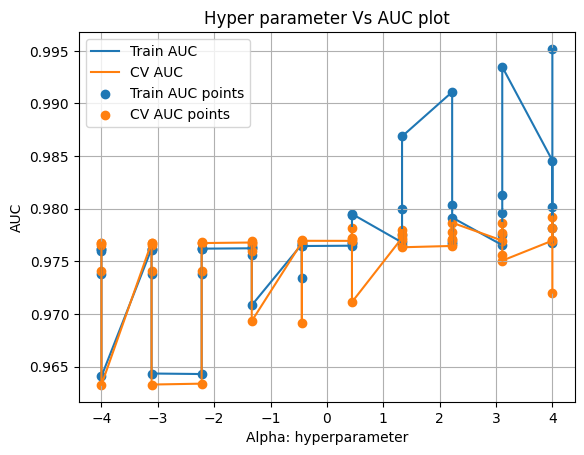

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.156986,0.016787,0.049503,0.003397,0.0001,0.0001,"{'C': 0.0001, 'gamma': 0.0001}",0.968541,0.969952,0.987197,...,0.975291,0.975841,0.975866,0.974850,0.976818,0.977489,0.975095,0.976741,0.976199,0.000880
1,0.136006,0.002151,0.045000,0.000770,0.0001,0.001,"{'C': 0.0001, 'gamma': 0.001}",0.968280,0.970004,0.987249,...,0.975165,0.975749,0.975838,0.974814,0.976828,0.977498,0.975135,0.976811,0.976199,0.000919
2,0.133200,0.001399,0.045194,0.001073,0.0001,0.01,"{'C': 0.0001, 'gamma': 0.01}",0.967548,0.969586,0.986570,...,0.974922,0.975580,0.975903,0.974820,0.976749,0.977118,0.974990,0.976410,0.976017,0.000845
3,0.135303,0.003174,0.044712,0.000911,0.0001,0.1,"{'C': 0.0001, 'gamma': 0.1}",0.964883,0.965615,0.981031,...,0.973166,0.973261,0.973950,0.972257,0.974813,0.974872,0.973125,0.973333,0.973831,0.000885
4,0.132531,0.000795,0.045097,0.001301,0.0001,1,"{'C': 0.0001, 'gamma': 1}",0.948579,0.947899,0.967496,...,0.964012,0.963088,0.964793,0.962550,0.965694,0.963862,0.963116,0.962543,0.964082,0.001201


In [6]:
params = {'C' : np.logspace(-4, 4, 10), 'gamma': [0.0001, 0.001, 0.01, 0.1, 1]}
svm = SVC()

clf = GridSearchCV(svm, params, cv=10, scoring='roc_auc', return_train_score=True)
clf.fit(X_train, y_train)

print("Best cross-validation score: {:.2f}".format(clf.best_score_))
print("Best parameters: ", clf.best_params_)
#print(clf.cv_results_)

results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_C'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
#A =  results['param_alpha']
log_alpha = []
for alpha in results['param_C']:
    log_alpha.append(mt.log10(alpha))

plt.plot(log_alpha, train_auc, label='Train AUC')
# ref: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(log_alpha, cv_auc, label='CV AUC')
# ref: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(log_alpha, train_auc, label='Train AUC points')
plt.scatter(log_alpha, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

### Training model with best hyper parameter does not making large impact, using default parameters.

In [7]:
rbf_svm = SVC(gamma=0.001, C=100.)
rbf_svm.fit(X_train, y_train)

SVC(C=100.0, gamma=0.001)

In [8]:
rbf_svm.score(X_val, y_val)

0.935

In [9]:
f_val = rbf_svm.decision_function(X_val)
f_val.shape, f_val[:10]

((1000,),
 array([-3.04107788, -1.41113141, -2.23654838,  1.94133676,  1.60471505,
        -2.49670518, -1.48081364, -3.44733079,  1.43827857,  1.51389734]))

In [10]:
def rbf_kernel(gamma, svi, X):
    dist = np.linalg.norm(svi - X)**2
    rbf = np.exp( - gamma * dist )
    return rbf

def decision_function(yi_ai, sv, intercept, gamma, X_val):

    z=[]
    for xq in X_val:
        sum = 0
        for i in range(len(sv)):
            rbf = rbf_kernel(gamma, sv[i], xq)
            sum += yi_ai[0][i] * rbf
        f_val = sum + intercept
        z.append(f_val)
    return np.array(z)

In [11]:
yi_ai = rbf_svm.dual_coef_    # product yiai
sv = rbf_svm.support_vectors_
intercept = rbf_svm.intercept_
gamma = rbf_svm.get_params()['gamma']

yi_ai.shape, sv.shape, intercept.shape
f_val_ = decision_function(yi_ai, sv, intercept, gamma, X_val)
f_val_.shape, f_val_[:10]

((1000, 1),
 array([[-3.04107788],
        [-1.41113141],
        [-2.23654838],
        [ 1.94133676],
        [ 1.60471505],
        [-2.49670518],
        [-1.48081364],
        [-3.44733079],
        [ 1.43827857],
        [ 1.51389734]]))

<h2><font color='Geen'> Implementing Platt Scaling to find P(Y==1|X)</font></h2>

Check this <a href='https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a'>PDF</a>
<img src='https://i.imgur.com/CAMnVnh.png'>


## SGD


> 4. Apply SGD algorithm with ($f_{cv}$, $y_{cv}$) and find the weight $W$ intercept $b$ ```Note: here our data is of one dimensional so we will have a one dimensional weight vector i.e W.shape (1,)``` 

> Note1: Don't forget to change the values of $y_{cv}$ as mentioned in the above image. We will calculate y+, y- based on data points in train data

> Note2: the Sklearn's SGD algorithm doesn't support the real valued outputs, We need to modify loss function.
<img src='https://i.imgur.com/zKYE9Oc.png'>
if Y[i] is 1, it will be replaced with y+ value else it will replaced with y- value

> 5. For a given data point from $X_{test}$, $P(Y=1|X) = \frac{1}{1+exp(-(W*f_{test}+ b))}$ where ` `$f_{test}$ ```= decision_function(```$X_{test}$```)```, W and b will be learned as metioned in the above step

In [12]:
f_val_[:10], y_val[:10]

(array([[-3.04107788],
        [-1.41113141],
        [-2.23654838],
        [ 1.94133676],
        [ 1.60471505],
        [-2.49670518],
        [-1.48081364],
        [-3.44733079],
        [ 1.43827857],
        [ 1.51389734]]),
 array([0, 0, 0, 1, 1, 0, 1, 0, 1, 1]))

In [13]:
f_val_ = np.hstack(f_val_)
f_val_[:10]

array([-3.04107788, -1.41113141, -2.23654838,  1.94133676,  1.60471505,
       -2.49670518, -1.48081364, -3.44733079,  1.43827857,  1.51389734])

In [14]:
def get_positive(np):
    #print((np+1) / (np+2))
    return (np+1) / (np+2)

def get_negative(nn):
    return 1 / (nn+2)

In [15]:
def convert_target_values(f_cv, y_cv):
    f_cv, y_cv = f_cv.tolist(), y_cv.tolist()
    for x in range(len(f_cv)):
        if f_cv[x] > 0:
            y_cv[x] = get_positive(x)
          
        elif f_cv[x] < 0:
            y_cv[x] = get_negative(x)
          
    return np.array(f_cv).reshape(-1, 1), np.array(y_cv)

In [16]:
f_cv, y_cv = convert_target_values(f_val_, y_val)
f_cv[:10], y_cv[:10]

(array([[-3.04107788],
        [-1.41113141],
        [-2.23654838],
        [ 1.94133676],
        [ 1.60471505],
        [-2.49670518],
        [-1.48081364],
        [-3.44733079],
        [ 1.43827857],
        [ 1.51389734]]),
 array([0.5       , 0.33333333, 0.25      , 0.8       , 0.83333333,
        0.14285714, 0.125     , 0.11111111, 0.9       , 0.90909091]))

In [17]:
def compute_log_loss(A):
    l = 0
    for i in A:
        l += (i[0] * np.log10(i[1])) + ((1-i[0]) * np.log10((1-i[1])))
    return (-1 / len(A)) * l

def sigmoid(w, x, b):
    return 1/(1 + np.exp(-(np.dot(x,w)+b)))

def pred(w,b, X, lists_of_list=True):
    N = len(X)
    predict = []
    if lists_of_list:
        for i in range(N):
            if sigmoid(w, X[i], b) >= 0.5: # sigmoid(w,x,b) returns 1/(1+exp(-(dot(x,w)+b)))
                predict.append(1)
            else:
                predict.append(0)
    else:
        if sigmoid(w, X, b) >= 0.5:
            predict.append(1)
        else:
            predict.append(0)
    return np.array(predict)

In [18]:
def sgd_classifier(X_train, y_train, w, b, eta0, alpha, epoch):
    train_loss_, test_loss_ = [], []
    
    def calculate_loss(w, b, x, y):
        train_loss = []
        
        for x1,y1 in zip(x, y):
            train_loss.append([ y1, sigmoid(w, x1, b) ])
        return compute_log_loss(train_loss)
        
    for i in epoch:
        
        for x_tr, y_tr in zip(X_train, y_train):
            
            w = (( 1-eta0 * (alpha/N)) * w) + ((eta0 * x_tr) * (y_tr - sigmoid(w,x_tr,b)))
            b = b + (eta0 * (y_tr - sigmoid(w,x_tr,b)))
            
        train_loss = calculate_loss(w,b, X_train, y_train)
        print("-"*10, i, w, b, train_loss, "\n")
        
        train_loss_.append(train_loss)
        
    return train_loss_, w, b

In [19]:
w = np.zeros_like(f_cv[0])
b = 0
eta0  = 0.0001
alpha = 0.0001
N = len(f_cv)
epoch = range(1, 10 + 1)
train_loss, w, b = sgd_classifier(f_cv, y_cv, w, b, eta0, alpha, epoch)

---------- 1 [0.09998708] -0.020275227030163268 0.2558283926435252 

---------- 2 [0.18611614] -0.037158106163084716 0.22238347554116858 

---------- 3 [0.26101485] -0.05131090415116865 0.1971632185595449 

---------- 4 [0.32689925] -0.06329269364117138 0.1777013340147876 

---------- 5 [0.38551906] -0.07354501928619055 0.16233388188475392 

---------- 6 [0.43822453] -0.08240812402795689 0.14994012486941255 

---------- 7 [0.48605497] -0.09014303648037371 0.13975502263949366 

---------- 8 [0.52981582] -0.09695104842083914 0.1312460766887878 

---------- 9 [0.57013806] -0.10298886272506722 0.12403470449860253 

---------- 10 [0.60752213] -0.10837984030579355 0.11784606057489579 



In [20]:
w.shape

(1,)

In [21]:
f_test = decision_function(yi_ai, sv, intercept, gamma, X_test)
f_test.shape

(1000, 1)

In [22]:
# P(Y=1|X)
def predict_proba(w, b, f_test):
    return 1 / (1 + np.exp( - (np.dot(f_test, w) +b)))

In [23]:
probs = predict_proba(w, b, f_test)
probs[:10], y_test[:10]

(array([0.63646968, 0.14950978, 0.42126428, 0.07662867, 0.48767118,
        0.21401983, 0.72755059, 0.10674594, 0.2204225 , 0.23174907]),
 array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0]))

In [24]:
probs[:20], y_test[:20]

(array([0.63646968, 0.14950978, 0.42126428, 0.07662867, 0.48767118,
        0.21401983, 0.72755059, 0.10674594, 0.2204225 , 0.23174907,
        0.19394785, 0.79748771, 0.67363109, 0.54620707, 0.62553184,
        0.13523809, 0.48895809, 0.71561952, 0.77428917, 0.22677001]),
 array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0]))


To try other calibration algorithm istonic regression also please check these tutorials

1. http://fa.bianp.net/blog/tag/scikit-learn.html#fn:1

2. https://drive.google.com/open?id=1MzmA7QaP58RDzocB0RBmRiWfl7Co_VJ7

3. https://drive.google.com/open?id=133odBinMOIVb_rh_GQxxsyMRyW-Zts7a

4. https://stat.fandom.com/wiki/Isotonic_regression#Pool_Adjacent_Violators_Algorithm
